### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


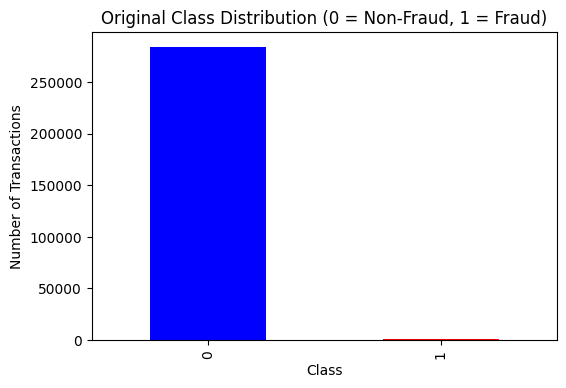


Balanced class distribution:
Class
0    492
1    492
Name: count, dtype: int64


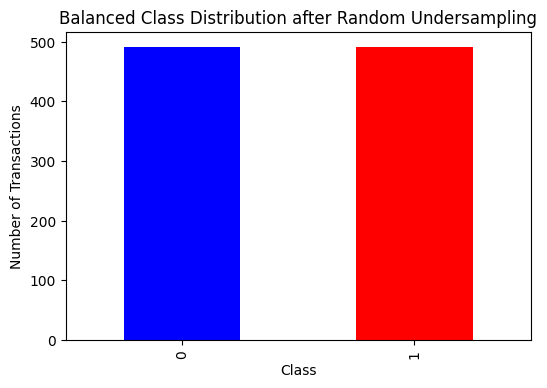

In [1]:
# write your code from here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import resample

# Load dataset (replace with your path or download link)
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df = pd.read_csv(url)

# Check class distribution
print("Original class distribution:")
print(df['Class'].value_counts())

# Visualize class imbalance
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Original Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

# Separate majority and minority classes
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

# Downsample majority class to minority class size
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

print("\nBalanced class distribution:")
print(df_balanced['Class'].value_counts())

# Visualize balanced class distribution
plt.figure(figsize=(6,4))
df_balanced['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Balanced Class Distribution after Random Undersampling')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()
